In [26]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Define column names
names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
         'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 
         'smoking_status', 'stroke']

# Load the dataset
file_path = r"C:\Users\19497\AppData\Local\Temp\d92e1d85-30e9-4e1d-9428-a5c76ece8dfb_Stroke Prediction Dataset.zip.dfb\healthcare-dataset-stroke-data.csv"  # Update this path if needed
data = pd.read_csv(file_path, delimiter=',', names=names, header=0)  # Set header=0 to use the file's headers

# Display the first few rows of the dataset
print(data.head())
print(data.columns)


Defaulting to user installation because normal site-packages is not writeable
       gender   age  hypertension  heart_disease ever_married      work_type  \
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
Ind

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace '?' with NaN and drop rows with missing data
data = data.replace('?', np.nan).dropna()

# Convert target variable to binary classification (0 or 1)
data['stroke'] = (data['stroke'] > 0).astype(int)

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['stroke'])  # Define X as all columns except the target
y = data['stroke']  # Define y as the target column
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # Encode categorical columns
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


Training Bagging...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Evaluation of Bagging:
Confusion Matrix:
[[925   4]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982



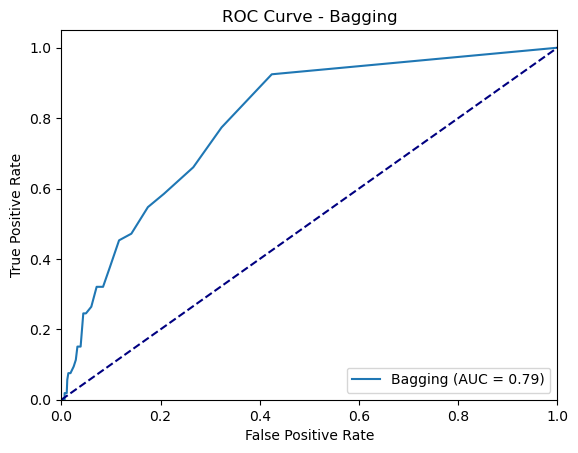

Training AdaBoost...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Evaluation of AdaBoost:
Confusion Matrix:
[[928   1]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



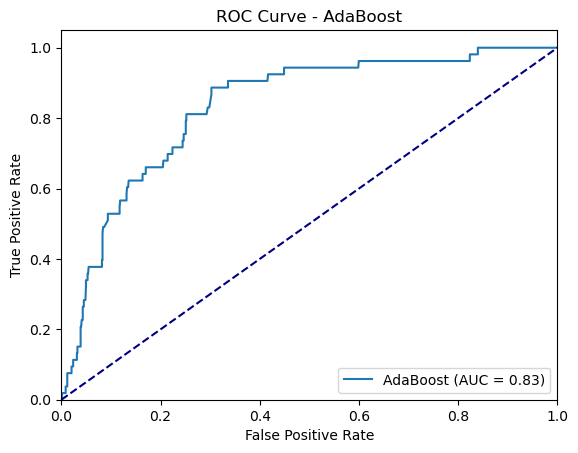

Training Random Forest...
Evaluation of Random Forest:
Confusion Matrix:
[[928   1]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



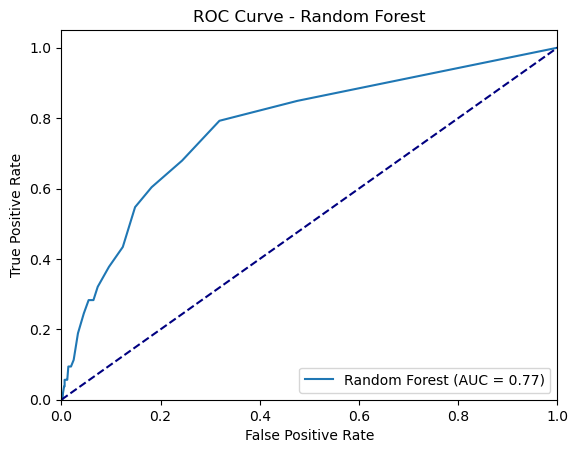

Training XGBoost...
Evaluation of XGBoost:
Confusion Matrix:
[[925   4]
 [ 52   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.20      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.57      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982



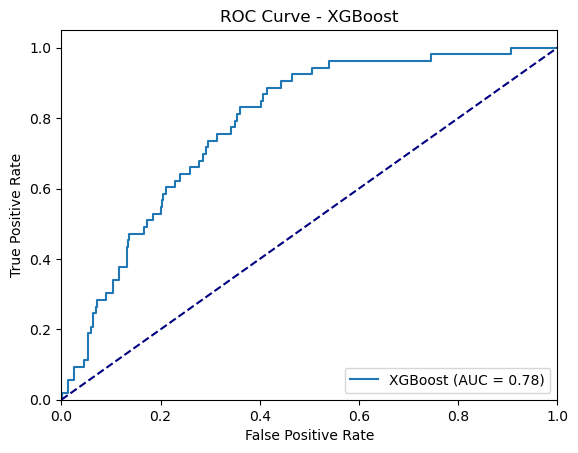

In [31]:
# Define ensemble classifiers
classifiers = {
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    
    ## Your code starts here
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Predict on test data
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC curve
    ## Your code ends here

    # Compute evaluation metrics
    ## Your code starts here
    print(f"Evaluation of {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    ## Your code ends here

    # Compute ROC curve
    ## Your code starts here
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # False Positive Rate, True Positive Rate
    roc_auc = auc(fpr, tpr)  # Area under the ROC curve
    ## Your code ends here

    # Plot ROC curve
    ## Your code starts here
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0.0, 1], [0.0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()
    ## Your code ends here


In [32]:
# First, define a single decision tree classifier
## Your code starts here
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)  # Train the single decision tree
y_pred_single_tree = single_tree.predict(X_test)  # Predict on test data
## Your code ends here

# Compare variance reduction by generating the classification report
print("\nVariance Reduction Comparison:")
print("Single Decision Tree - Classification Report:")
## Your code starts here
print(classification_report(y_test, y_pred_single_tree))  # Print classification report for single tree
## Your code ends here

# Train and compare with ensemble classifiers
for name, clf in classifiers.items():
    print(f"\n{name} - Classification Report:")
    ## Your code starts here
    clf.fit(X_train, y_train)  # Train each ensemble classifier
    y_pred = clf.predict(X_test)  # Predict on test data for ensemble classifiers
    print(classification_report(y_test, y_pred))  # Print classification report for ensemble classifier
    ## Your code ends here



Variance Reduction Comparison:
Single Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       929
           1       0.14      0.11      0.12        53

    accuracy                           0.91       982
   macro avg       0.54      0.54      0.54       982
weighted avg       0.91      0.91      0.91       982


Bagging - Classification Report:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982


AdaBoost - Classification Report:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.20      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.57      0.51      0.50       982


In [ ]:
**Question:** Explain how using ensemble techniques imporve the classification results in terms of bias and variance?
**Answer:**
1-Bagging (e.g., Random Forest) primarily reduces variance by combining multiple models trained on different subsets of the data, leading to more stable and reliable predictions.
2-Boosting (e.g., AdaBoost, XGBoost) reduces bias and variance by sequentially training models that correct previous errors, allowing the ensemble to improve both aspects of the prediction process.
Both methods are designed to improve generalization, but they do so by addressing bias and variance differently:
1.a.Bagging: Focus on reducing variance (prevent overfitting).
1.b.Boosting: Focus on reducing bias (prevent underfitting) while also addressing variance.
By using ensemble methods, you balance the trade-off between bias and variance, improving overall classification performance.
